In [656]:
import copy
import torch
import sys
import os
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import util
import seaborn as sns
import matplotlib as plt

# define network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        layers = []
        for i in range(len(layer_dim)-1):
            in_dim = layer_dim[i]
            out_dim = layer_dim[i+1]
            layers.append(nn.Linear(in_dim, out_dim))
        self.layers =nn.ModuleList(layers)

    def forward(self, x):
        for i in range(len(self.layers)-1):
            x = activation_f(self.layers[i](x))
        x = self.layers[-1](x)
        return x

# define architecture
activation_f = nn.LeakyReLU()
layer_dim = "784x128x80x40x32x16x10"
layer_dim = layer_dim.split("x")
layer_dim = [int(x) for x in layer_dim]

# create net and pop
net = Net()

pop_size = 10
subs = []
for j in range(pop_size):
  subs.append(Net())
population = util.Population(subs)
population.cuda(1)

# data path for loading in weights
path="models/seed_0_784x128x80x40x32x16x10_outer_iterations_55_num_samples_60000_num_epochs_25_dataset_mnist_optim_adam_activation_relu/"


In [657]:
# loading in weights
net.load_state_dict(torch.load(path+"black_box.pt"))
population.load(path+"population_iteration_54.pt")
util.evaluate(net,population.subs[6])

[1.482470790148969e-06,
 (1.2242712728038896e-06,
  1.86023942205793e-06,
  3.282586021668976e-06,
  8.004155461094342e-06,
  1.3825185305904597e-05,
  1.3125097211741377e-05),
 0.0001671314239501953,
 8.051486565853017e-12]

In [652]:
#x=util.evaluate(net,population.subs[6],return_nets=True)
balance_two(x[0],x[1])
for l in x[0].layers:
    print(l.weight.abs().mean())

tensor(0.1390, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1390, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.1390, device='cuda:0', grad_fn=<MeanBackward0>)


In [653]:
for l in x[0].layers:
    print(l.weight.abs().mean())

tensor(0.1390, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.1390, device='cuda:0', grad_fn=<MeanBackward0>)


In [453]:
evaluate_mnist_dist(net,x[1])

tensor([0.0005, 0.0004, 0.0003, 0.0004, 0.0002, 0.0003, 0.0005, 0.0005, 0.0003,
        0.0002], device='cuda:0')


In [454]:
# load in and align networks over specified iterations
iter_list=[1,5,10,15,20,25,30,35,40,45,50,55]
evolutions=[]
net.load_state_dict(torch.load(path+"black_box.pt"))
blackbox=None
for i in iter_list:
    print(i)
    population.load(path+"population_iteration_"+str(i-1)+".pt")
    x=util.evaluate(net,population.subs[3],return_nets=True)
    balance_two(x[0],x[1])
    evolutions.append(x[1])
    if blackbox is None:
        blackbox=x[0]

1
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
5
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
10
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
15
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_f

In [455]:
# calculate max and mean dists per layer
layer_data=[]
for e in evolutions:
    layer_data.append(get_layer_dists(blackbox,e))

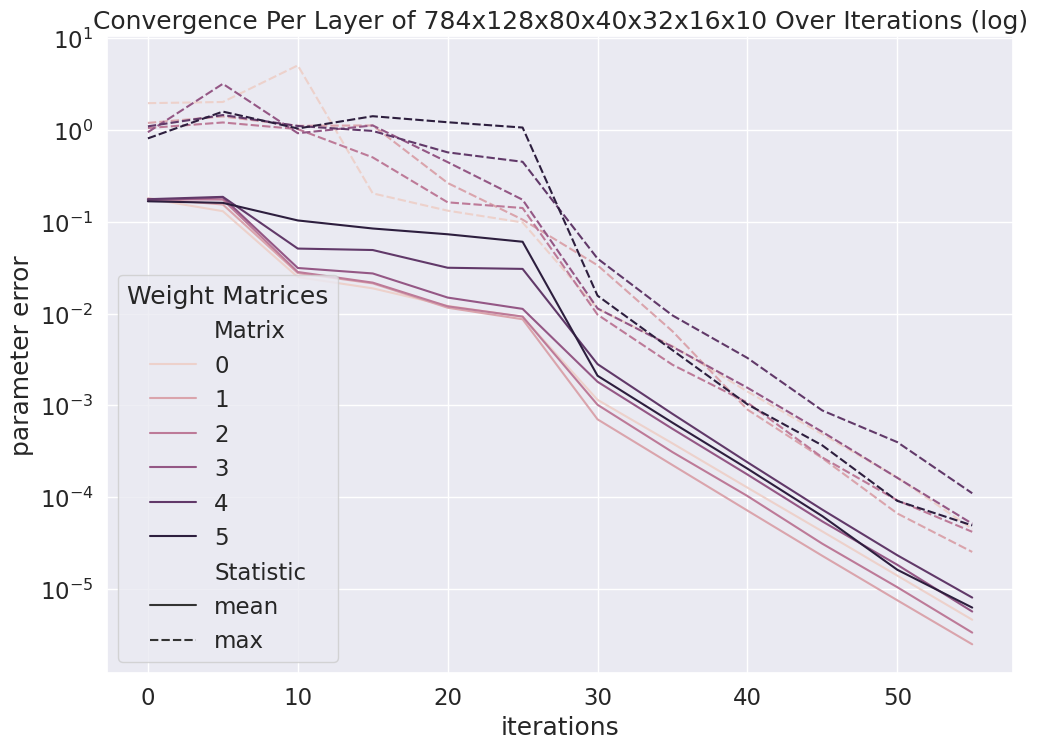

In [714]:
sns.set(font_scale=1.5)

plot_layer_data(layer_data,log=True,lineplot=True)

In [ ]:
# calculate max and mean dists per layer for weights and biases
layer_data_bias=[]
for e in evolutions:
    layer_data_bias.append(get_layer_dists(blackbox,e,weight=False))

layer_data_weight=[]
for e in evolutions:
    layer_data_weight.append(get_layer_dists(blackbox,e,bias=False))


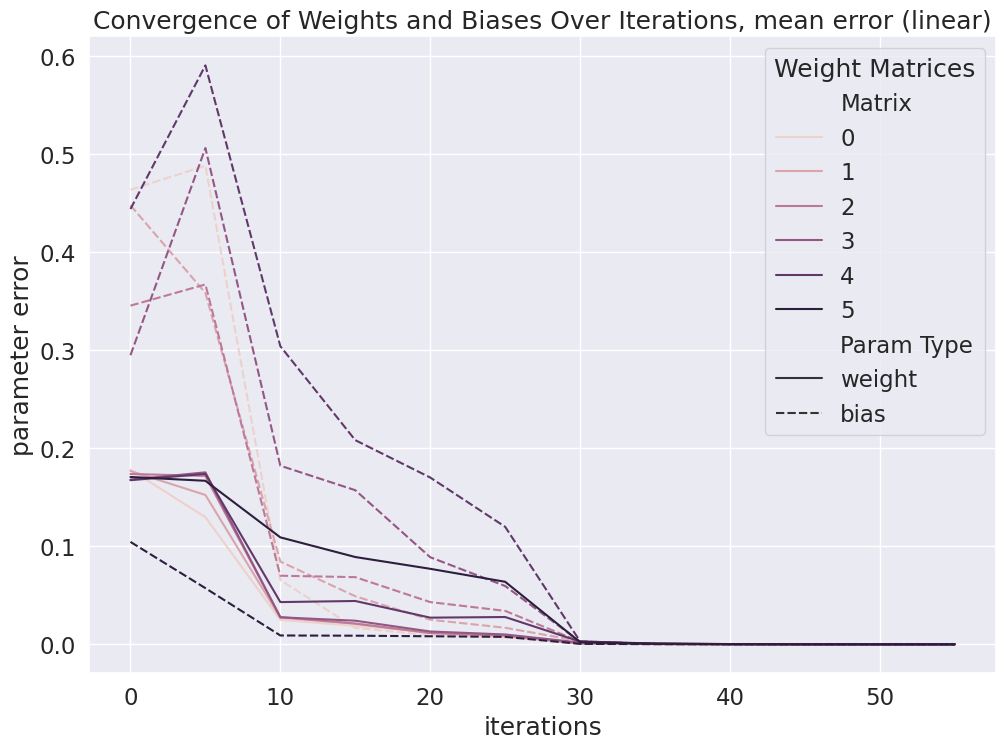

In [693]:
plot_layer_data_wandb(layer_data_weight,layer_data_bias,log=False,lineplot=True,stat="mean")
sns.set(font_scale=1.5)


In [476]:
# calculate evolution of each individual param
weight_evolution=get_weight_evolution_over_time(blackbox,evolutions)

/home/yehuda/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/yehuda/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


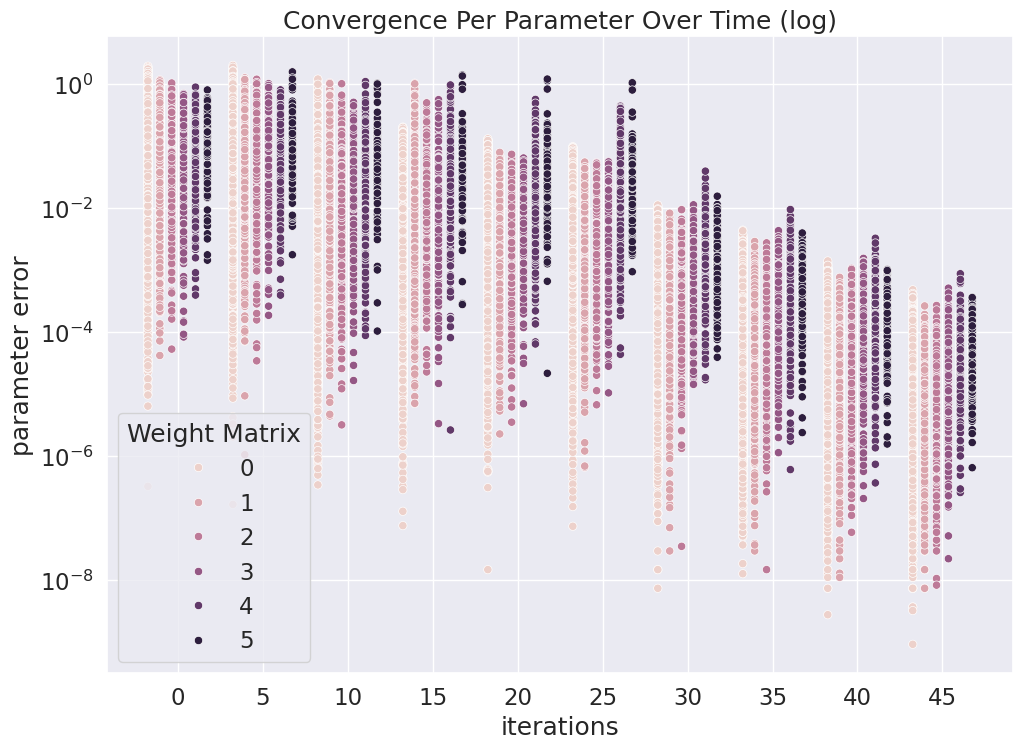

In [684]:
plot_weight_evolutions(weight_evolution,log=True)
sns.set(font_scale=1.5)


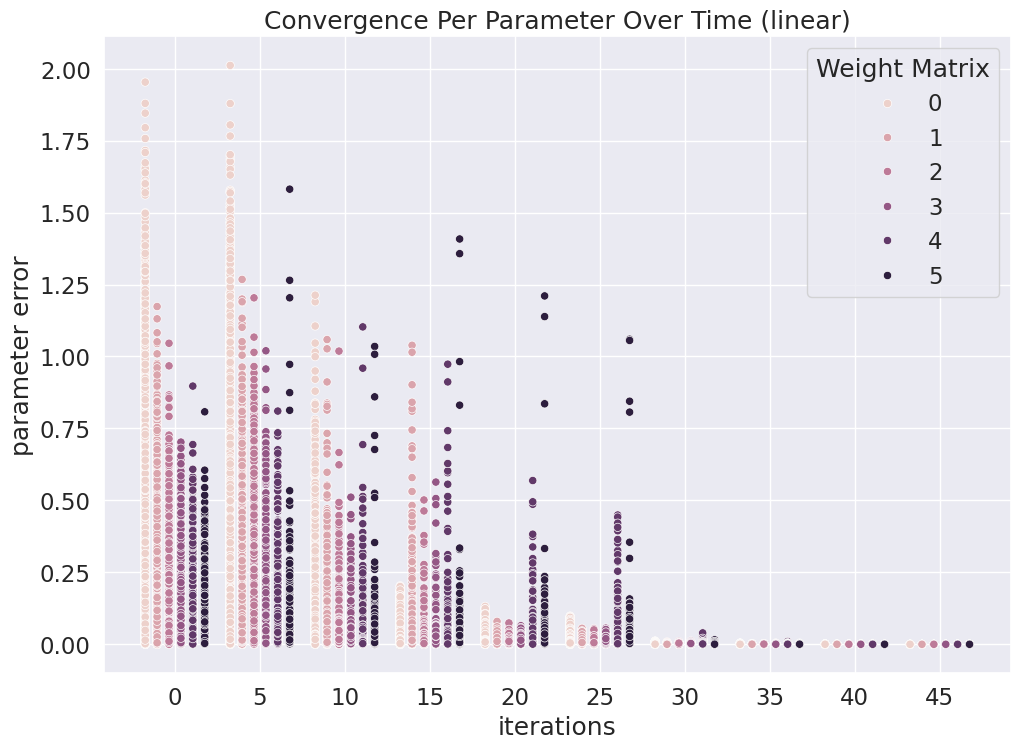

In [685]:
plot_weight_evolutions(weight_evolution,log=False)
sns.set(font_scale=1.5)


Text(0.5, 1.0, 'Convergence On MNIST Dataset Over Iterations (log)')

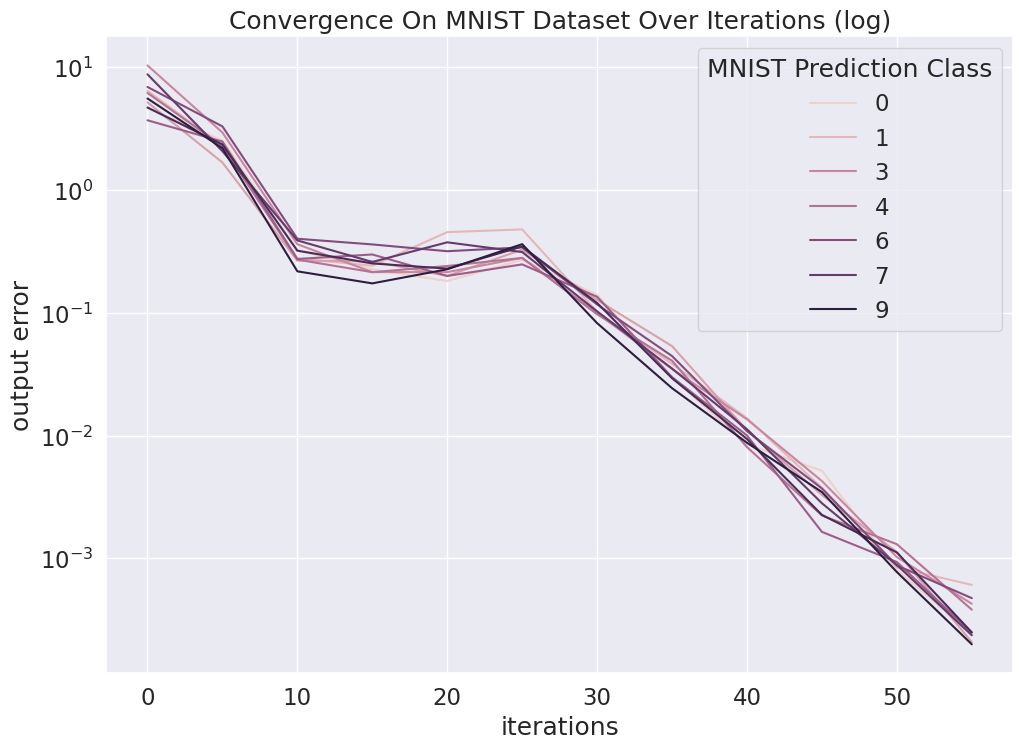

In [778]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
def evaluate_mnist_dist(net1,net2):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
    
    
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
    errs = []
    with torch.no_grad():
        for images, _ in test_loader:
            images = images.view(-1, 784)
    
            outputs1 = net1(images.cuda())
            outputs2 = net2(images.cuda())
            errs.append((outputs1-outputs2).abs().mean(dim=0))
    mean_errs = (sum(errs)/len(errs))
    return mean_errs

# mean_errs=[]
# iterations=[]
# layers=[]
# for idx,e in enumerate(evolutions):
#     mean_errs += evaluate_mnist_dist(e,blackbox)
#     for k in range(10):
#         iterations.append(idx)
#         layers.append(k)

# mean_errs = [x.item() for x in mean_errs]
combo_data = {"output error" : mean_errs,"iterations":[iter_list[x] for x in iterations],"Matrix":layers}
sns.set(font_scale=1.5)

viz = sns.lineplot(data=combo_data , x="iterations", y="output error", hue="Matrix")

# plt.pyplot.yscale('linear')
# scaling_type="linear"

plt.pyplot.yscale('log')
scaling_type="log"
#viz.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,title="MNIST Prediction Class")

viz.legend(title="MNIST Prediction Class")
viz.set_title('Convergence On MNIST Dataset Over Iterations ('+scaling_type+')')


In [696]:
5

5

In [713]:
# balance the weights by magnitude, for all layers
def balance(net):
    means = []
    for i in range(6):
        means.append(net.layers[i].weight.abs().mean())
    
    root=1
    for m in means:
        root*=m
    root = root**(1/6)
    
    for i in range (len( means)-1):
        factor= root/means[i] 
        means[i] *= factor
        means[i+1]/=factor
        print(means[i])
        with torch.no_grad():
            net.layers[i].weight *=factor
            net.layers[i].bias *=factor
            net.layers[i+1].weight /= factor

# balance the weights by magnitude, for all layers. net2 is balanced to match net 1 
def balance_two(net,net2):
    means = []
    for i in range(6):
        means.append(net.layers[i].weight.abs().mean())
    
    root=1
    for m in means:
        root*=m
    root = root**(1/2)
    
    for i in range (len( means)-1):
        factor= root/means[i] 
        means[i] *= factor
        means[i+1]/=factor
        print(means[i])
        with torch.no_grad():
            net.layers[i].weight *=factor
            net.layers[i].bias *=factor
            net.layers[i+1].weight /= factor

            net2.layers[i].weight *=factor
            net2.layers[i].bias *=factor
            net2.layers[i+1].weight /= factor


# get max dist between two already aligned networks
def get_max_dist(net1,net2):
    x=(net1,net2)
    dists=[]
    for i in range(6):
        for j in range(x[0].layers[i].weight.shape[0]):
            for k in range(x[0].layers[i].weight.shape[1]):
                dists.append(abs(x[0].layers[i].weight[j][k]  -  x[1].layers[i].weight[j][k]))
        for j in range(x[0].layers[i].bias.shape[0]):
            dists.append(abs(x[0].layers[i].bias[j] -  x[1].layers[i].bias[j]))
    return max(dists)  

# get max and mean dist per layer between two already aligned networks
def get_layer_dists(net1,net2,weight=True,bias=True):
    max_dists=[]
    mean_dists=[]
    x=(net1,net2)
    for i in range(6):
        dists=[]
        if weight:
            for j in range(x[0].layers[i].weight.shape[0]):
                for k in range(x[0].layers[i].weight.shape[1]):
                    dists.append(abs(x[0].layers[i].weight[j][k]  -  x[1].layers[i].weight[j][k]))
        if bias:
            for j in range(x[0].layers[i].bias.shape[0]):
                dists.append(abs(x[0].layers[i].bias[j] -  x[1].layers[i].bias[j]))
        max_dists.append(max(dists))
        mean_dists.append(sum(dists)/len(dists))
    return max_dists,mean_dists
    
# evaluate how networks differ on training data and test data of dataset
def evaluate_mnist_dist(net1,net2):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
    
    
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
    errs = []
    with torch.no_grad():
        for images, _ in test_loader:
            images = images.view(-1, 784)
    
            outputs1 = net1(images.cuda())
            outputs2 = net2(images.cuda())
            errs.append((outputs1-outputs2).abs().mean(dim=0))
    print(sum(errs)/len(errs))

    # errs = []
    # with torch.no_grad():
    #     for images, _ in trainloader:
    #         images = images.view(-1, 784)
    
    #         outputs1 = net1(images.cuda())
    #         outputs2 = net2(images.cuda())
    #         errs.append((outputs1-outputs2).abs().mean(dim=0))
    # print(sum(errs)/len(errs))

# evaluate blame heatmap
def evaluate_heatmap(net1,net2):
    heatmap = []
    for i in range(784):
        dists  = [abs(net1.layers[0].weight[j][i] - net2.layers[0].weight[j][i]).item() for j in range(128)]
        heatmap.append(sum(dists)/len(dists))
    return torch.tensor(heatmap).reshape(28,28)

# get a dict, where each entry is weight delts over time, hopefully getting smaller as we converge
def get_weight_evolution_over_time(blackbox,evolutions):
    weight_evolution = {}
    
    for i in range(6):
        for j in range(x[0].layers[i].weight.shape[0]):
            for k in range(x[0].layers[i].weight.shape[1]):
                dists = [abs(blackbox.layers[i].weight[j][k]  -  evolutions[e].layers[i].weight[j][k]).item() for e in range(len(evolutions))]
                weight_evolution["weight_"+str(i)+":"+str(j)+":"+str(k)] = dists
    
        for j in range(x[0].layers[i].bias.shape[0]):
            dists = [(abs(blackbox.layers[i].bias[j] -  evolutions[e].layers[i].bias[j])).item() for e in range(len(evolutions)) ]
            weight_evolution["bias_"+str(i)+":"+str(j)] = dists
    return weight_evolution


# plot the weight evolutions over time
def plot_weight_evolutions(weight_evolution,log=True):
    weight_deltas=[]
    iterations=[]
    layers=[]
    for layer in range(6):
        shape = net.layers[layer].weight.shape
        for i in range(shape[0]):
            for j in range(shape[1]):
                for idx, delta in enumerate(weight_evolution["weight_"+str(layer)+":"+str(i)+":"+str(j)]):
                    if idx>9:
                        continue
                    weight_deltas.append(delta)
                    iterations.append(iter_list[idx]+layer*.7 - (5*.7)/2)
                    layers.append(layer)
    data = {"parameter error" : weight_deltas,"iterations":iterations,"Weight Matrix":layers}
    sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
    #sns.set_theme(rc={'figure.figsize':(18.7,8.27)})
    sns.set(font_scale=1.5)

    viz=sns.scatterplot(data=data , x="iterations", y="parameter error", hue="Weight Matrix")
    if log:
        plt.pyplot.yscale('log')  
        scaling_type="log"
    else:
        plt.pyplot.yscale('linear')
        scaling_type="linear"

    viz.set_title('Convergence Per Parameter Over Time ('+scaling_type+')')
    #viz.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,title="Weight Matrices")

    viz.set_xticks(iter_list[0:-2]) 


def plot_layer_data(layer_data,log=True,lineplot=False):
    max_deltas=[]
    mean_deltas=[]
    iterations=[]
    layers=[]
    for i in range(len(layer_data)):
        max_dists=layer_data[i][0]
        mean_dists=layer_data[i][1]
        for j in range(len(max_dists)):
            layers.append(j)
            iterations.append(iter_list[i])
            max_deltas.append(max_dists[j].item())
            mean_deltas.append(mean_dists[j].item())
    
    max_data = {"parameter error" : max_deltas,"iterations":iterations,"layer":layers}
    mean_data = {"parameter error" : mean_deltas,"iterations":iterations,"layer":layers}
    markers=[]
    for _ in iterations:
        markers.append("mean")
    for _ in iterations:
        markers.append("max") 
    combo_data = {"parameter error" : mean_deltas+max_deltas,"iterations":iterations+iterations,"Matrix":layers+layers,"Statistic":markers}

    #sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

    if lineplot:
        viz = sns.lineplot(data=combo_data , x="iterations", y="parameter error", hue="Matrix",style="Statistic")
    else:
        viz = sns.scatterplot(data=combo_data , x="iterations", y="parameter error", hue="Matrix",style="Statistic")
    if log:
        plt.pyplot.yscale('log')
        scaling_type="log"
    else:
        plt.pyplot.yscale('linear')
        scaling_type="linear"

    #viz.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,title="Weight Matrices")
    viz.legend(title="Weight Matrices")

    viz.set_title('Convergence Per Layer of 784x128x80x40x32x16x10 Over Iterations ('+scaling_type+')')


def plot_layer_data_wandb(layer_data_w,layer_data_b,log=True,lineplot=False,stat="max"):
    
    max_deltas_w=[]
    mean_deltas_w=[]
    iterations_w=[]
    layers_w=[]
    for i in range(len(layer_data_w)):
        max_dists=layer_data_w[i][0]
        mean_dists=layer_data_w[i][1]
        for j in range(len(max_dists)):
            layers_w.append(j)
            iterations_w.append(iter_list[i])
            max_deltas_w.append(max_dists[j].item())
            mean_deltas_w.append(mean_dists[j].item())
    
    max_data_w = {"weight_delta" : max_deltas_w,"iterations":iterations_w,"layer":layers_w}
    mean_data_w = {"weight_delta" : mean_deltas_w,"iterations":iterations_w,"layer":layers_w}

    max_deltas_b=[]
    mean_deltas_b=[]
    iterations_b=[]
    layers_b=[]
    for i in range(len(layer_data_b)):
        max_dists=layer_data_b[i][0]
        mean_dists=layer_data_b[i][1]
        for j in range(len(max_dists)):
            layers_b.append(j)
            iterations_b.append(iter_list[i])
            max_deltas_b.append(max_dists[j].item())
            mean_deltas_b.append(mean_dists[j].item())
    
    max_data_b = {"weight_delta" : max_deltas_b,"iterations":iterations_b,"layer":layers_b}
    mean_data_b = {"weight_delta" : mean_deltas_b,"iterations":iterations_b,"layer":layers_b}
    
    markers=[]
    for _ in iterations_w:
        markers.append("weight")
    for _ in iterations_b:
        markers.append("bias") 
    if stat=="max":
        deltas=max_deltas_w+max_deltas_b
    else:
        deltas=mean_deltas_w+mean_deltas_b
    combo_data = {"parameter error" : deltas,"iterations":iterations_w+iterations_b,"Matrix":layers_w+layers_b,"Param Type":markers}

    #sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

    if lineplot:
        viz = sns.lineplot(data=combo_data , x="iterations", y="parameter error", hue="Matrix",style="Param Type")
    else:
        viz = sns.scatterplot(data=combo_data , x="iterations", y="parameter error", hue="Matrix",style="Param Type")
    if log:
        plt.pyplot.yscale('log')
        scaling_type="log"
    else:
        plt.pyplot.yscale('linear')
        scaling_type="linear"

    #viz.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,title="Weight Matrices")

    viz.legend(title="Weight Matrices")
    viz.set_title('Convergence of Weights and Biases Over Iterations, '+stat+' error ('+scaling_type+')')




44
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)


In [161]:
weight_evolution["weight_1:1:1"]

[0.1782674789428711,
 0.020015325397253036,
 0.004674877971410751,
 0.0003201700747013092,
 4.331022500991821e-05]

/home/yehuda/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/yehuda/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


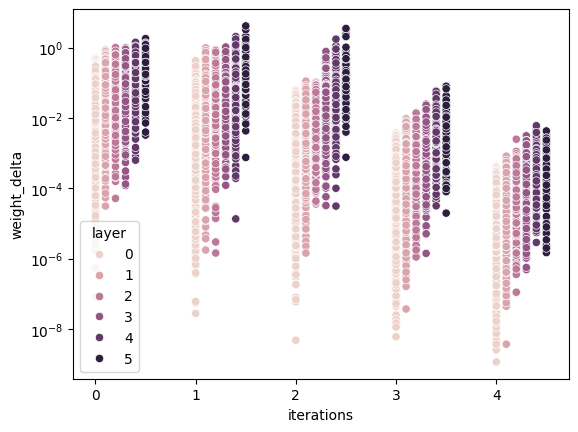

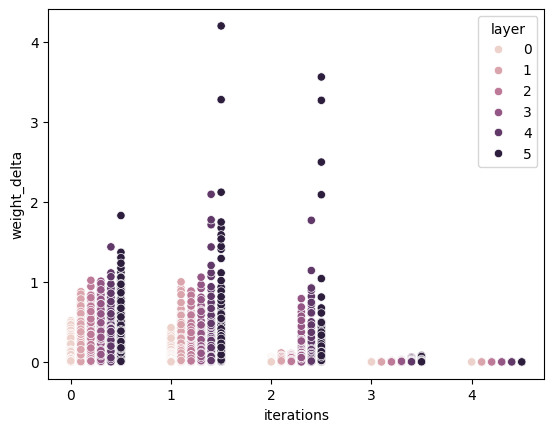

In [190]:
sns.scatterplot(data=data , x="iterations", y="weight_delta", hue="layer")
plt.pyplot.yscale('linear')


In [ ]:
heatmaps=[]
for e in evolutions:
    heatmaps.append(evaluate_heatmap(blackbox,e))
vmin=heatmaps[-1].min()
vmax=heatmaps[0].max()

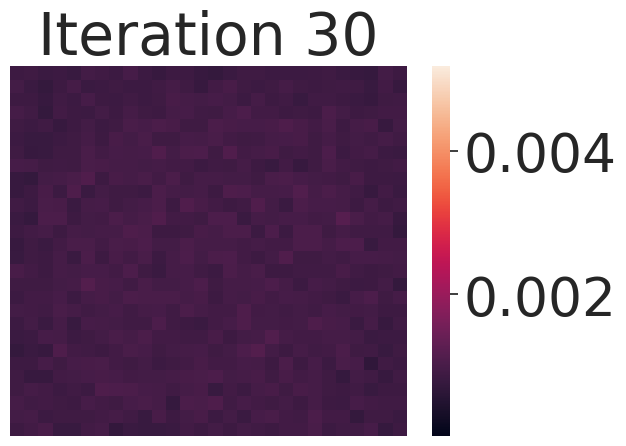

In [772]:
# images=[]
# for i in range(len(heatmaps)):
i=6
sns.set_theme(rc={'figure.figsize':(6.4,4.8)})
sns.set(font_scale=3.5)

viz=sns.heatmap(heatmaps[i],vmin=vmin, vmax=vmax/80,yticklabels=False,xticklabels=False)
#viz.set_title("Weight Error Heatmap (Timestep "+str(iter_list[i])+")")
viz.set_title("Iteration "+str(iter_list[i]))
sns.set(font_scale=3.5)
sns_figure = viz.get_figure()


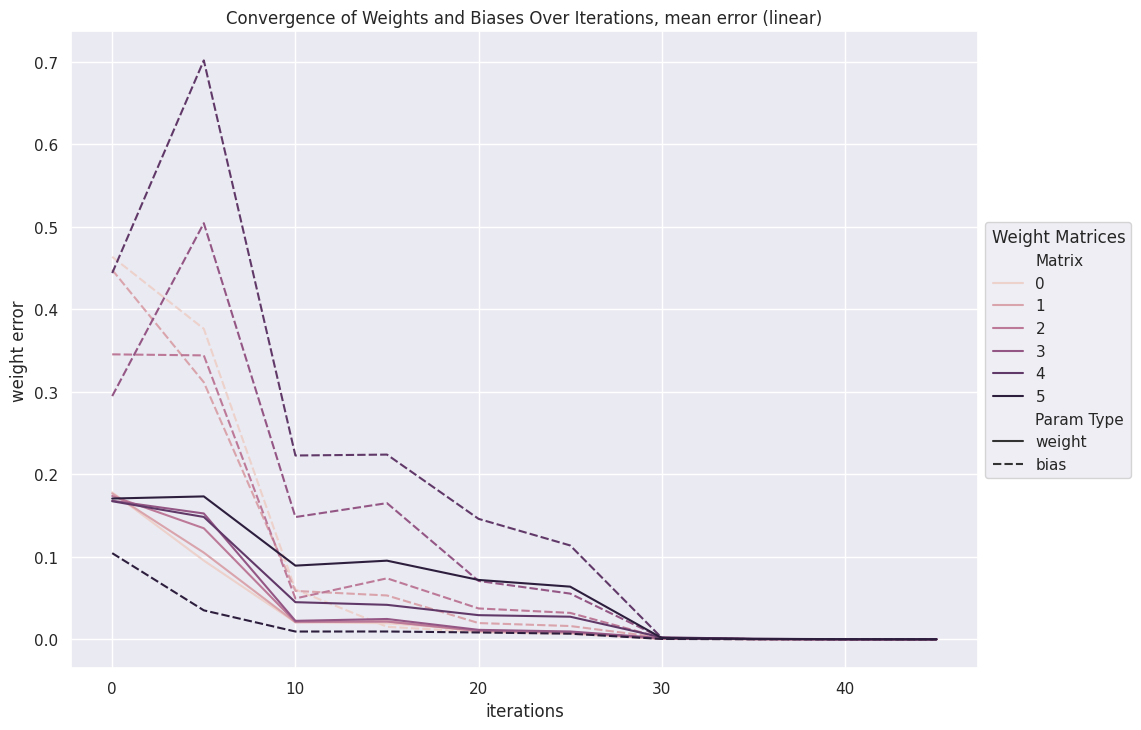

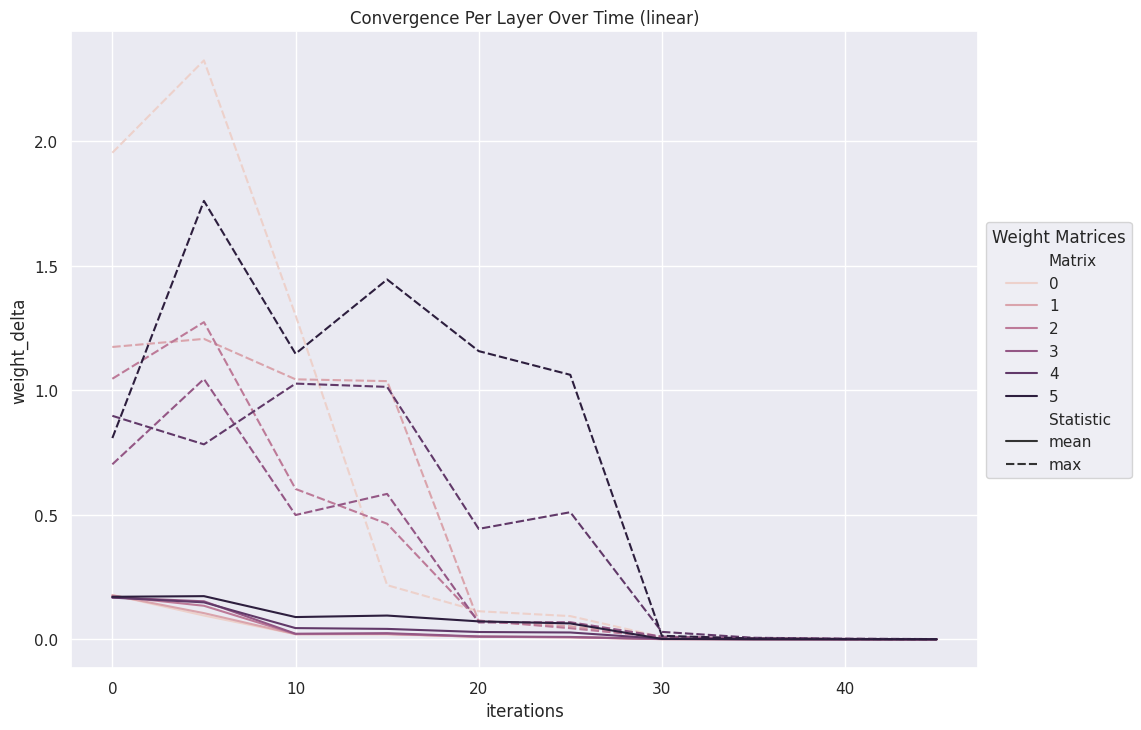

In [434]:
plot_layer_data(layer_data_weight,log=False,lineplot=True)

<Axes: xlabel='iterations', ylabel='weight_delta'>

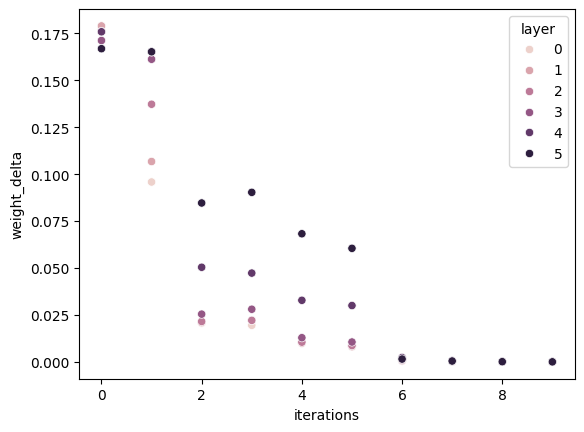

In [316]:
sns.scatterplot(data=mean_data , x="iterations", y="weight_delta", hue="layer")

In [379]:
weight_evolution=get_weight_evolution_over_time(blackbox,evolutions)

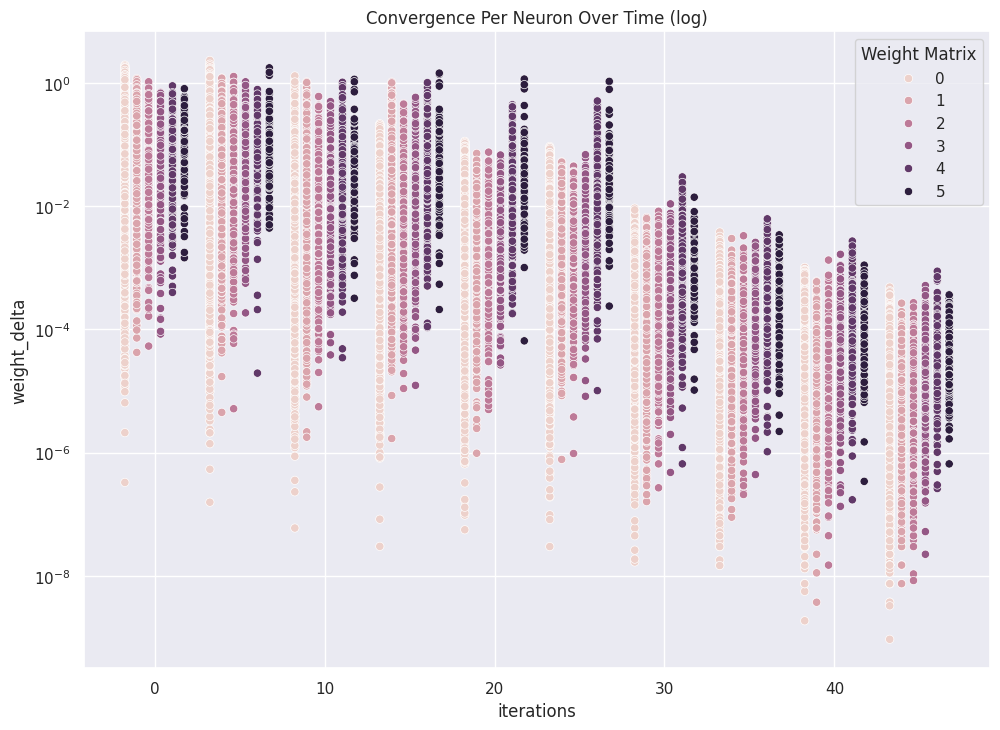

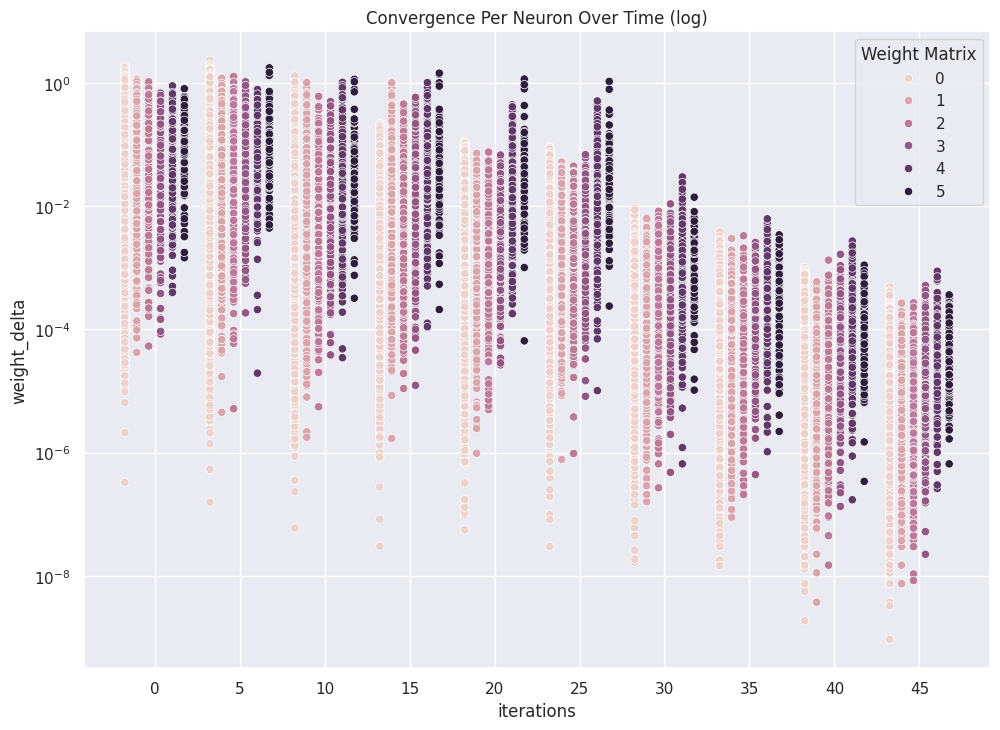

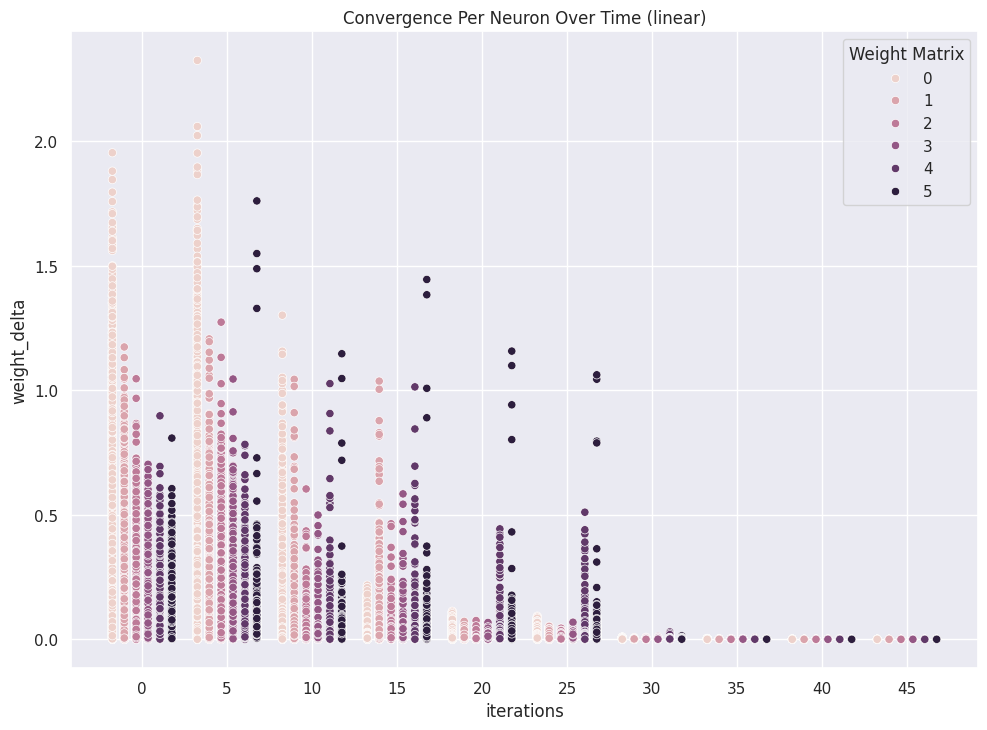

In [396]:
plot_weight_evolutions(weight_evolution,log=False)

In [642]:
error_net = Net()
guess_net = Net()
error_net.load_state_dict(torch.load(path+"black_box.pt"))
guess_net.load_state_dict(torch.load(path+"black_box.pt"))

# introduce error:
with torch.no_grad():
    error_net.layers[2].weight[5][6] = -error_net.layers[2].weight[5][6]

In [504]:
evaluate_mnist_dist(error_net.cuda(),guess_net.cuda())

tensor([0.0080, 0.0088, 0.0071, 0.0148, 0.0054, 0.0045, 0.0075, 0.0072, 0.0050,
        0.0053], device='cuda:0')

In [510]:
evaluate_mnist_dist(error_net.cuda(),population.subs[-1].cuda())

tensor([0.8125, 0.9675, 0.7266, 0.9032, 0.7334, 0.7010, 1.4021, 0.5764, 0.9153,
        0.7927], device='cuda:0')

In [ ]:
device=0

pop_size = 10
subs = []
for j in range(pop_size):
  subs.append(Net())
subs[-1].load_state_dict(torch.load(path+"black_box.pt"))
population = util.Population(subs)
population.cuda(device)
net = net.cuda(device)
criterion = nn.L1Loss()

lr = 0.1
num_samples=6000
outer_iterations=10
input_dim=784
population.set_optimizer(optim.Adam(population.parameters(), lr=lr))

with torch.enable_grad():
    for outer_iter in range(outer_iterations):
        sys.stdout.flush()

        restore = False

        if outer_iter > 25:
            lr = lr* 0.8
            population.set_optimizer(optim.Adam(population.parameters(), lr=lr))
        
        
        print("ITERATION: ",outer_iter, len(population.inputs))    
        samples_to_generate = num_samples
        while samples_to_generate > 0:
            
            new_inputs = util.get_adv(population.subs,lr=0.01,num_samples=min(samples_to_generate,100002),epochs=2000,schedule = [500,1000,1500],reverse=False,range_=1.000,input_dim=input_dim) 
            samples_to_generate -= 100002
            new_outputs = net(new_inputs.cuda(device)).cpu().detach()
            population.add_data(new_inputs, new_outputs,window=500)
        
        gc.collect()
        for i in range(10):
           population.train_one_epoch(batch_size=128, epoch_num=i,restore=False) 
           sys.stdout.flush()
        if outer_iter in [15,30,54]:
            population.evaluate(net,tanh=tanh)

ITERATION:  0 0
tensor(0.5000)
init. error: tensor(-0.4795, device='cuda:0', grad_fn=<NegBackward0>)
final error: tensor(-0.5093, device='cuda:0', grad_fn=<NegBackward0>)
stats: tensor(0.5922) tensor(-0.0364)
Epoch 1, Min Loss: 2.146461491889142, Max Loss: 13.329593884184005,Mean Loss: 5.131954647789302
Epoch 2, Min Loss: 1.1538543447535088, Max Loss: 8.30713888685754,Mean Loss: 2.7434475793483406
Epoch 3, Min Loss: 1.112051247282231, Max Loss: 11.629431470911554,Mean Loss: 3.602853558418598
Epoch 4, Min Loss: 0.9813073011154824, Max Loss: 56.88462685777786,Mean Loss: 8.217658733687504
Epoch 5, Min Loss: 0.9158617499026847, Max Loss: 206.85200435557263,Mean Loss: 22.750441388500498
Epoch 6, Min Loss: 0.8728968970319058, Max Loss: 47.418398207806526,Mean Loss: 7.579423521681035
Epoch 7, Min Loss: 0.8477566419763768, Max Loss: 69.31266355514526,Mean Loss: 13.128120395731418
Epoch 8, Min Loss: 0.827303427330991, Max Loss: 557.3967346434897,Mean Loss: 79.42069922431986
Epoch 9, Min Loss: 0

In [640]:
x=util.evaluate(subs[-1],guess_net,return_nets=True)
balance_two(x[0],x[1])
get_max_dist(x[0],x[1])

tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MulBackward0>)


tensor(0.0013, device='cuda:0', grad_fn=<AbsBackward0>)

In [641]:
x[0].layers[2].weight[5][6], x[1].layers[2].weight[5][6]


(tensor(-0.2129, device='cuda:0', grad_fn=<SelectBackward0>),
 tensor(-0.2129, device='cuda:0', grad_fn=<SelectBackward0>))

In [552]:
# calculate swaps


aligned= evolutions[0]
population.load(path+"population_iteration_"+str(1-1)+".pt")
balance_two(aligned,population.subs[3])
og = population.subs[3]

tensor(0.1127, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1127, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1127, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1127, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1127, device='cuda:0', grad_fn=<MulBackward0>)


In [569]:
balance(aligned)
balance(og)

tensor(0.1157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1133, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1133, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1133, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1133, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1133, device='cuda:0', grad_fn=<MulBackward0>)


In [558]:
aligned.layers[-2].bias.abs().mean()

tensor(0.2266, device='cuda:0', grad_fn=<MeanBackward0>)

In [557]:
og.layers[-2].bias.abs().mean()

tensor(0.1722, device='cuda:0', grad_fn=<MeanBackward0>)

In [565]:
(aligned.layers[-2].bias*   (og.layers[-2].bias.abs().mean()/aligned.layers[-2].bias.abs().mean())) #.abs().mean()

tensor([ 1.8085e-01, -1.4249e-02, -4.5664e-01, -1.8905e-01,  2.1332e-01,
        -5.1936e-02,  2.3699e-01, -2.9814e-04,  2.8027e-01, -4.2595e-02,
        -7.1078e-02, -3.2151e-01,  2.9045e-01,  2.6686e-01,  7.8189e-02,
         6.1266e-02], device='cuda:0', grad_fn=<MulBackward0>)

In [566]:
og.layers[-2].bias

Parameter containing:
tensor([-4.0744e-02,  2.4014e-01, -2.9988e-01,  7.4911e-02, -3.9310e-02,
         3.0938e-01,  1.9335e-01,  1.9942e-01, -5.0732e-01,  3.3376e-01,
        -4.2630e-04, -1.3824e-02,  2.2693e-01,  4.6393e-02, -6.4459e-02,
        -1.6530e-01], device='cuda:0', requires_grad=True)

In [546]:
evaluate_mnist_dist(og.cuda(),aligned.cuda())

tensor([1.1452e-06, 1.0120e-06, 1.0292e-06, 1.0526e-06, 8.9396e-07, 1.1725e-06,
        1.3349e-06, 1.0517e-06, 9.3098e-07, 1.0024e-06], device='cuda:0')

KeyError: 0.2408374547958374

In [584]:
alignment_over_time = {}

In [600]:
for idx in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]:
    print(idx)
    iteration=idx-1
    net.load_state_dict(torch.load(path+"black_box.pt"))
    population.load(path+"population_iteration_"+str(iteration)+".pt")
    og = population.subs[3]
    x1=util.evaluate(net,og,return_nets=True)
    x2=util.evaluate(og,net,return_nets=True)

    cannonical = x2[0]
    permuted = x1[1]
    
    
    def get_alignment(permuted,cannonical,layer):
        cannonical_positions={}
        for idx,b in enumerate(cannonical.layers[layer].bias):
            cannonical_positions[b.item()] = idx
    
        alignment = []
        for idx,b in enumerate(permuted.layers[layer].bias):
            alignment.append(cannonical_positions[b.item()])
        return alignment
    
    alignments=[]
    for layer in range(5):
        alignments.append(get_alignment(permuted,cannonical,layer))
    
    alignment_over_time[idx] = alignments

5
10
15
20
25
30
35
40
45
50
55


In [598]:
for i in alignment_over_time[1]:
    print(len(i))

128
80
40
32
16


Text(0.5, 1.0, 'Total Alignment Swaps (296 neurons)')

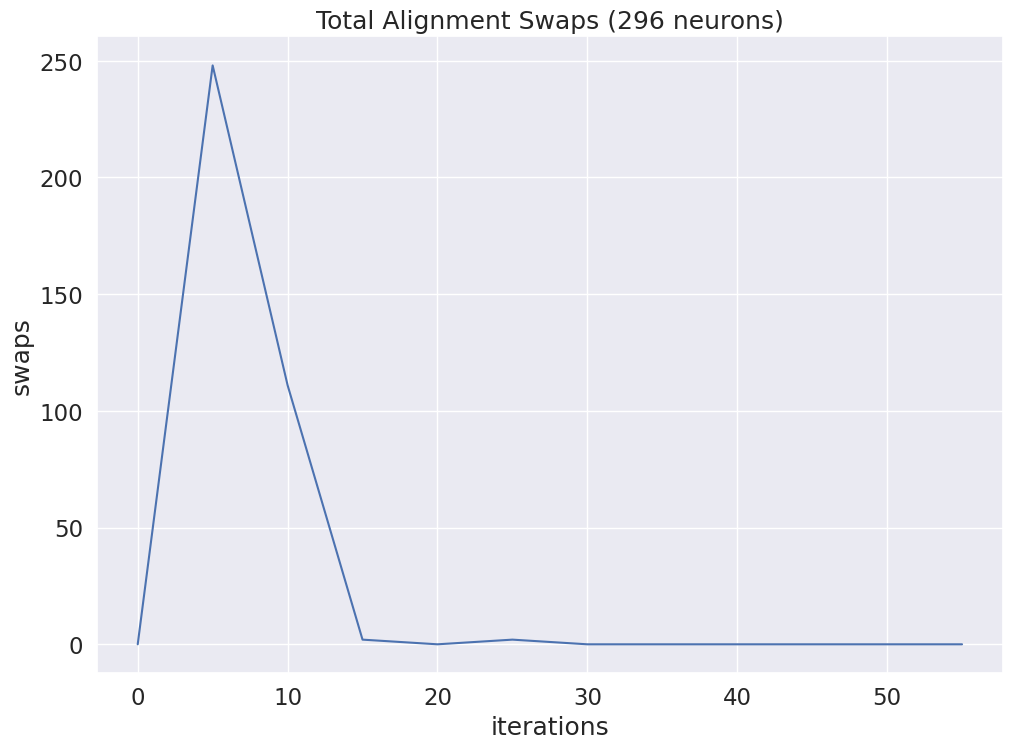

In [776]:
total_swaps=[]
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

for layer in [0,1,2,3,4]:
    swaps_layer_0_over_time = []
    original_positions = alignment_over_time[1][layer]
    num_neurons=len(original_positions)
    for idx in iter_list:
        swaps=0
        for i in range(len(original_positions)):
            if original_positions[i] != alignment_over_time[idx][layer][i]:
                swaps+=1
        swaps_layer_0_over_time.append(swaps)
        original_positions=alignment_over_time[idx][layer]
    total_swaps.append(swaps_layer_0_over_time)

total_swaps=torch.tensor(total_swaps).sum(dim=0)
sns.set(font_scale=1.5)

combo_data = {"swaps" : total_swaps,"iterations":iter_list}

viz = sns.lineplot(data=combo_data , x="iterations", y="swaps")

plt.pyplot.yscale('linear')
scaling_type="linear"

# plt.pyplot.yscale('log')
# scaling_type="log"

#viz.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,title="MNIST Prediction Class")

#viz.set_title('Swaps in Layer '+str(layer+2)+' ('+str(num_neurons)+' neurons)')
viz.set_title('Total Alignment Swaps (296 neurons)')

In [630]:
total_swaps

tensor([  0, 248, 111,   2,   0,   2,   0,   0,   0,   0,   0,   0])

In [704]:
alignment_over_time[0] = alignment_over_time[1]